In [1]:
import warnings
warnings.filterwarnings('ignore')
from dropout_bayesian import dataset, Current
# 데이터 불러오기
df = dataset()
# current 클래스 생성
current = Current(df)

In [2]:
# index는 시간 단위 timestamp
# 역률평균, R S T 상역률로 역률평균을 예측
df.describe()

,역률평균,R상역률,S상역률,T상역률,LABEL_NAME
count,720.000000,720.000000,720.000000,720.000000,720.0
mean,0.949095,0.943734,0.948002,0.949588,0.0
std,0.006147,0.006513,0.006241,0.007392,0.0
min,0.926559,0.917448,0.925911,0.924349,0.0
25%,0.945136,0.939909,0.944580,0.944711,0.0
50%,0.949735,0.943229,0.946940,0.952344,0.0
75%,0.952257,0.947282,0.951318,0.955013,0.0
max,0.964498,0.960808,0.964844,0.962175,0.0


Epoch 1/150
2/2 [==============================] - 4s 828ms/step - loss: 1.2184 - val_loss: 1.3084
Epoch 2/150
2/2 [==============================] - 0s 230ms/step - loss: 0.9515 - val_loss: 0.8539
Epoch 3/150
2/2 [==============================] - 0s 224ms/step - loss: 0.7161 - val_loss: 0.7577
Epoch 4/150
2/2 [==============================] - 0s 243ms/step - loss: 0.5920 - val_loss: 0.8485
Epoch 5/150
2/2 [==============================] - 0s 228ms/step - loss: 0.5783 - val_loss: 0.5678
Epoch 6/150
2/2 [==============================] - 0s 225ms/step - loss: 0.4913 - val_loss: 0.6158
Epoch 7/150
2/2 [==============================] - 0s 230ms/step - loss: 0.4820 - val_loss: 0.4742
Epoch 8/150
2/2 [==============================] - 0s 233ms/step - loss: 0.3799 - val_loss: 0.4570
Epoch 9/150
2/2 [==============================] - 0s 229ms/step - loss: 0.4450 - val_loss: 0.3758
Epoch 10/150
2/2 [==============================] - 0s 257ms/step - loss: 0.3564 - val_loss: 0.4459
Epoch 11/

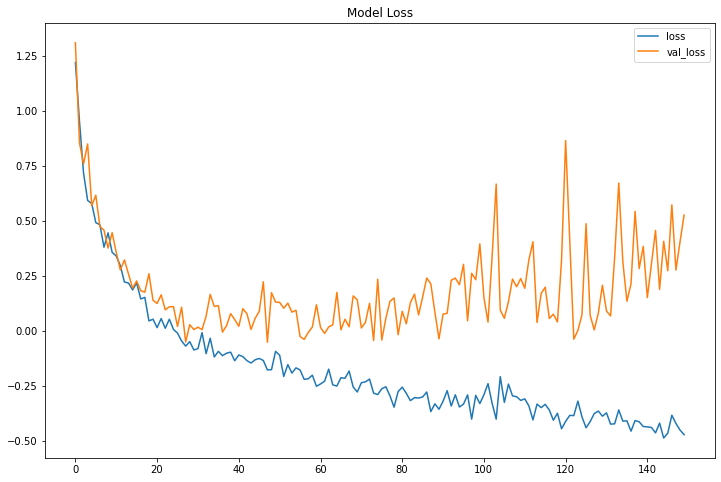

100%|██████████| 20/20 [00:09<00:00,  2.08it/s]


rmse: 0.6862362027168274
r2: 0.4624464950487598
For Uncertainty model, 0.5868263473053892 are in 99% confidence interval


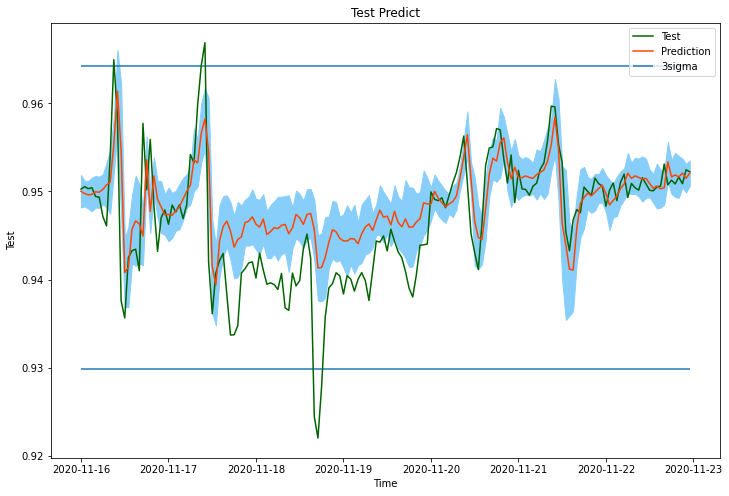

In [6]:
# Transformer LSTM 모델로 예측
# - 양방향 LSTM 2개와 FF layer 쌓은 트랜스포머 구조
# - key_dim : multihead attention 입력 차원
# - num_head : 병렬을 얼마나 할 것인지
# - ff_dim : FF 신경망 units
# - num_blocks : 트랜스포머 블록 층 (2개 이상이면 loss 크게 증가해서 1개로 한다)
model = current.Transfomer_LSTM(key_dim = 128, num_heads=2, ff_dim=16, num_blocks=1)

# 150번 반복, Adam optimizer
model = current.fit(model=model, epochs = 150, batch_size = 256, show_loss = True)

# Monte Carlo 샘플링 20번, 99% 신뢰구간 추정
TransformerLSTM_predict = current.predict_ci(model=model, n_sample = 20, ci=2.58, show= True)

In [4]:
# 수평선은 데이터의 3시그마 값
# 푸른 범위가 모델의 추정된 99% 신뢰구간 

Epoch 1/150
2/2 [==============================] - 10s 933ms/step - loss: 0.4460 - val_loss: 0.5949
Epoch 2/150
2/2 [==============================] - 4s 326ms/step - loss: 0.4139 - val_loss: 0.5346
Epoch 3/150
2/2 [==============================] - 4s 4s/step - loss: 0.3930 - val_loss: 0.5056
Epoch 4/150
2/2 [==============================] - 1s 322ms/step - loss: 0.3721 - val_loss: 0.4760
Epoch 5/150
2/2 [==============================] - 4s 4s/step - loss: 0.3365 - val_loss: 0.4473
Epoch 6/150
2/2 [==============================] - 0s 275ms/step - loss: 0.3215 - val_loss: 0.4156
Epoch 7/150
2/2 [==============================] - 4s 4s/step - loss: 0.2948 - val_loss: 0.3940
Epoch 8/150
2/2 [==============================] - 0s 275ms/step - loss: 0.2478 - val_loss: 0.5019
Epoch 9/150
2/2 [==============================] - 4s 4s/step - loss: 0.2448 - val_loss: 0.5784
Epoch 10/150
2/2 [==============================] - 0s 257ms/step - loss: 0.2146 - val_loss: 0.3168
Epoch 11/150
2/2 [==

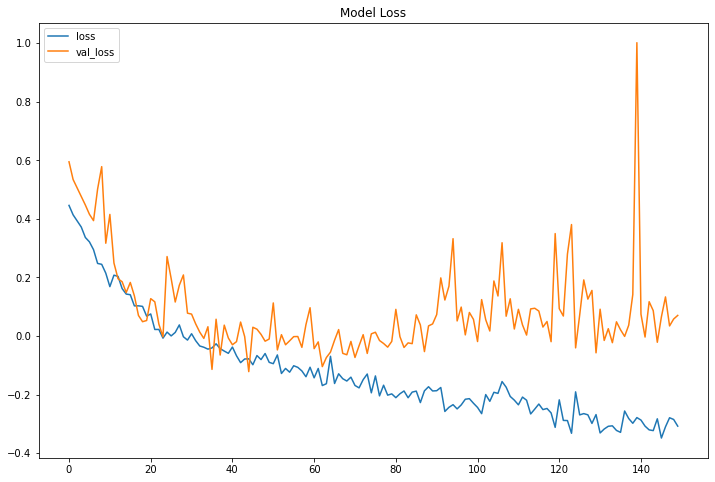

100%|██████████| 20/20 [00:08<00:00,  2.39it/s]

rmse: 0.7112205624580383
r2: 0.42259171141178786
For Uncertainty model, 0.5508982035928144 are in 99% confidence interval


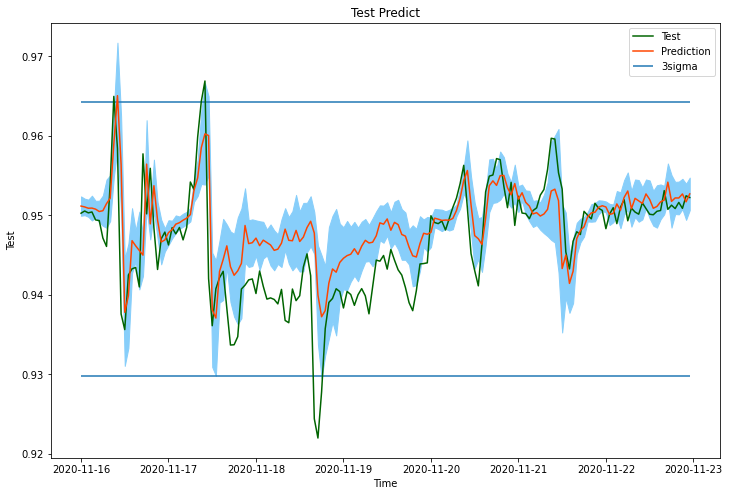

In [5]:
# LSTM 모델
model2 = current.LSTM()
model2 = current.fit(model=model2, epochs = 150, batch_size = 256, show_loss = True)
LSTM_predict = current.predict_ci(model=model2, n_sample = 20, ci=2.58, show= True)